## Set Up Environment

In [20]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import umap
%matplotlib inline

In [34]:
# Set plotting settings
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
# Color palettes for organs
scimap = ["#E4E4E4", "#A50CFA", "#FF804B", "#009800", "#B90000", "#FF0000", 
          "#0000FF", "#660000", "#61FFE2", "#00FF82", "#FF86FF", "#FFB623", 
          "#FFFF00"]
sns.set_palette(scimap)

## Loading data

In [22]:
data = pd.read_csv("https://raw.githubusercontent.com/cns-iu/hra-cell-type-populations-supporting-information/main/ad_hoc_queries/output/umap_datasets_as_percentage.csv")
data.head()

,dataset_id,organ,jejunum,descending colon,superior part of duodenum,descending part of duodenum,ascending part of duodenum,horizontal part of duodenum,sigmoid colon,distal part of ileum,...,diaphragmatic surface of liver,capsule of the liver,left cardiac atrium,right cardiac atrium,Posteromedial head of posterior papillary muscle of left ventricle,Lateral segmental bronchus,Left apical bronchopulmonary segment,central zone of prostate,peripheral zone of prostate,Interlobar adipose tissue of right mammary gland
0,https://entity.api.hubmapconsortium.org/entiti...,VHFSmallIntestine,0.103,0.000,0.000,0.000,0.000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
1,https://entity.api.hubmapconsortium.org/entiti...,VHFColon,0.000,0.883,0.000,0.000,0.000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2,https://entity.api.hubmapconsortium.org/entiti...,VHFSmallIntestine,0.000,0.000,0.026,0.032,0.000,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,https://entity.api.hubmapconsortium.org/entiti...,VHFSmallIntestine,0.000,0.000,0.000,0.000,0.051,0.092,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
4,https://entity.api.hubmapconsortium.org/entiti...,VHFColon,0.000,0.000,0.000,0.000,0.000,0.000,0.052,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0


## Preparing Categorical Variables

In [23]:
# Creates variable for biological sex.
data['sex'] = np.where(data['organ'].str.contains('VHF'),'female','male')
data.sex = data.sex.astype("category")

In [24]:
# Removes VHM & VHF from organ names
data.organ = data.organ.str.replace("VHF","", regex=True)
data.organ = data.organ.str.replace("VHM","", regex=True)
data.organ = data.organ.str.replace("Left","", regex=True)
data.organ = data.organ.str.replace("Right","", regex=True)
data.organ = data.organ.str.replace("Small","Small ", regex=True)
data.organ = data.organ.str.replace("Large","Large ", regex=True)
data.organ = data.organ.str.replace("Mammary","Mammary ", regex=True)
data.organ = data.organ.str.replace("Urinary","Urinary ", regex=True)
data.organ = data.organ.astype("category")
data['organCode'] = data['organ'].cat.codes

In [25]:
# Creates object with list of organs
data_organs = data[['dataset_id','organ','organCode']].drop_duplicates()

# Creates object with list of donor sexes
data_sex = data[['dataset_id','sex',]].drop_duplicates()

In [26]:
# Creates dataset for UMAP
#data.shape[0]
data_umap = data.iloc[0:553, 3:42]

## UMAP Analysis

In [27]:
scaled_data_umap = StandardScaler().fit_transform(data_umap)
titlestring = "UMAP HRA-Pop Data Sets Tissue Percentages"

In [28]:
# Version 1 - Euclidean Distance
reducer1 = umap.UMAP(n_neighbors=10, min_dist=1, n_components=2, metric='euclidean')
embedding = reducer1.fit_transform(scaled_data_umap)

Text(0.0, 1.0, 'Distance Metric: Euclidean Distance')

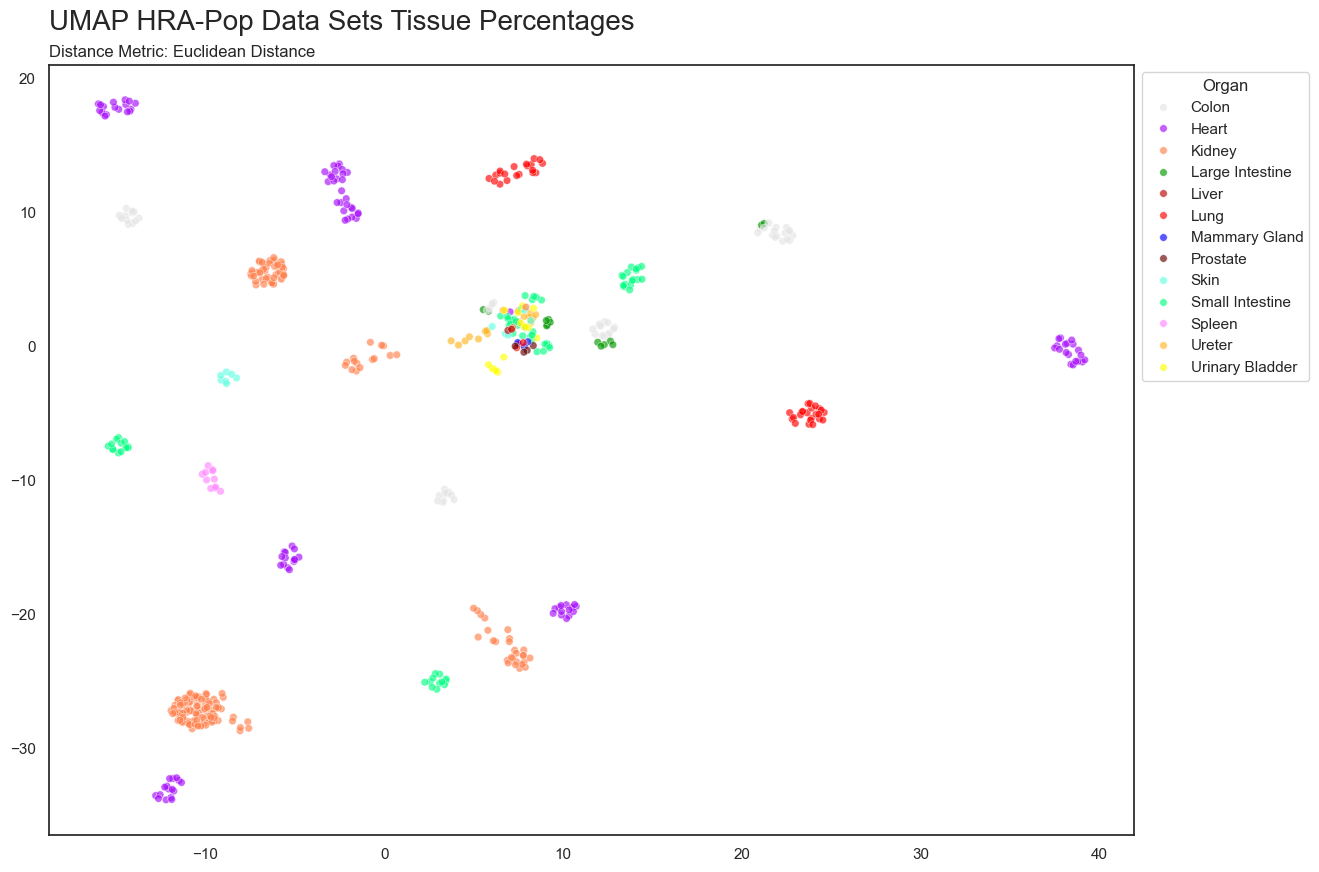

In [35]:
sns.scatterplot(x = embedding[:, 0], 
                y = embedding[:, 1], s=30,
                                hue=data_organs.organ, alpha=0.65)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Organ")
plt.suptitle(titlestring, x=0.334, y=.935, fontsize=20)
plt.title('Distance Metric: Euclidean Distance', loc='left', fontsize=12)

In [13]:
# Version 2 - Manhattan Distance
reducer2 = umap.UMAP(n_neighbors=25, min_dist=1, n_components=2, metric='minkowski')
embedding2 = reducer2.fit_transform(scaled_data_umap)

Text(0.0, 1.0, 'Distance Metric: Minkowski Distance')

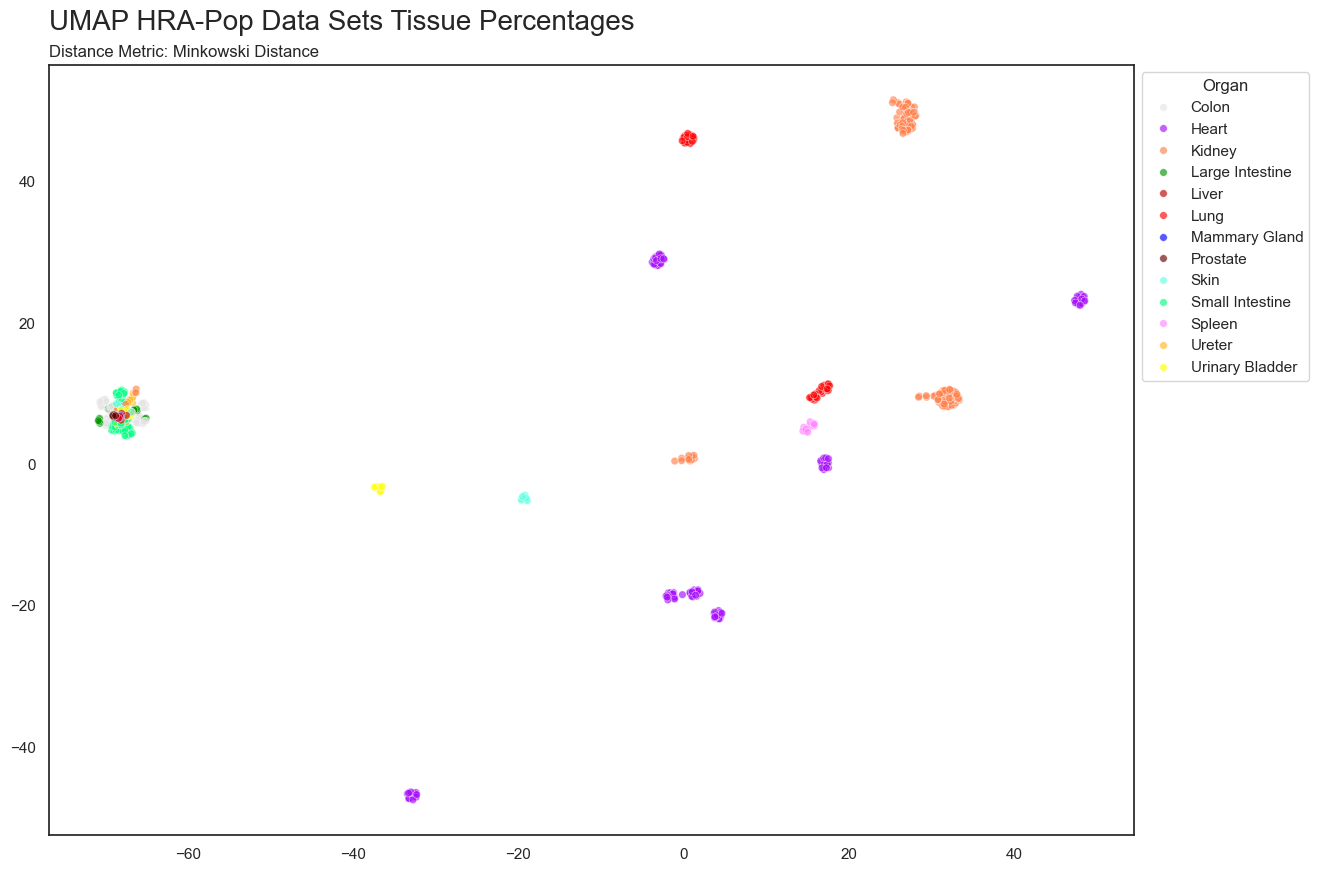

In [36]:
# UMAP Scatter Plot of Results
sns.scatterplot(x = embedding2[:, 0], 
                y = embedding2[:, 1], s=30,
                hue=data_organs.organ, alpha=0.65)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Organ")
plt.suptitle(titlestring, x=0.334, y=.935, fontsize=20)
plt.title('Distance Metric: Minkowski Distance', loc='left', fontsize=12)

In [15]:
# Version 3 - Cosine
reducer = umap.UMAP(n_neighbors=20, min_dist=1, n_components=2, metric='cosine')
embedding3 = reducer.fit_transform(scaled_data_umap)

Text(0.0, 1.0, 'Distance Metric: Cosine Similarity')

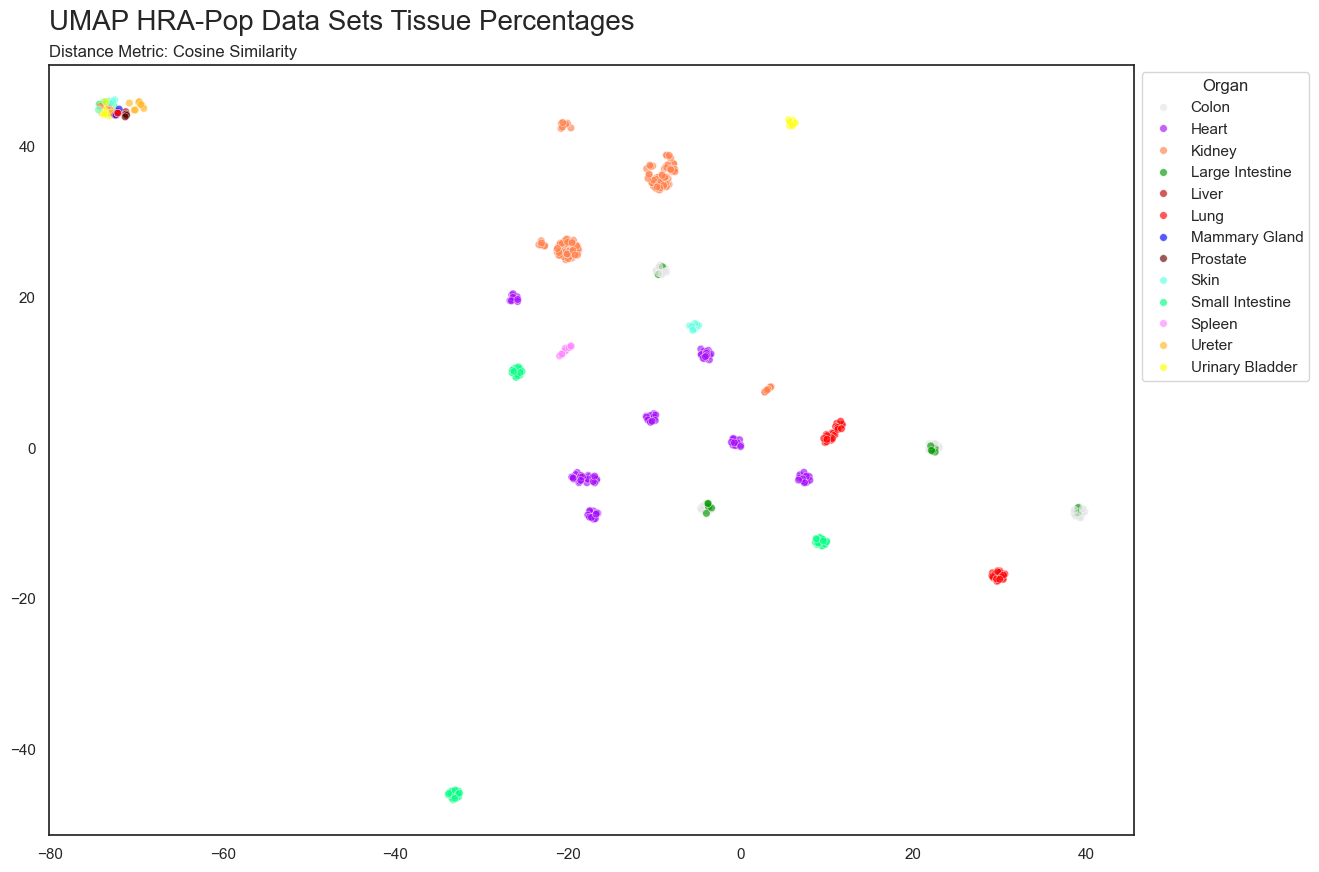

In [37]:
# UMAP Scatter Plot of Results
sns.scatterplot(x = embedding3[:, 0], 
                y = embedding3[:, 1], s=30,
                hue=data_organs.organ, alpha=0.65)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Organ")
plt.suptitle(titlestring, x=0.334, y=.935, fontsize=20)
plt.title("Distance Metric: Cosine Similarity", loc='left', fontsize=12)